In [1387]:
import numpy as np
import sympy as sym
from sympy import oo
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [1388]:
α, γ, k, μ, C, I = sym.symbols('α, γ, k, μ, C, I')

dCdt = α*C - (k*C*I) + γ*I
dIdt = (k*C*I) - γ*I - μ*I

In [1389]:
dCdt

-C*I*k + C*α + I*γ

In [1390]:
dIdt

C*I*k - I*γ - I*μ

In [1391]:
eqs = sym.solve([dCdt, dIdt], [C, I])
eqs

[(0, 0), ((γ + μ)/k, α*(γ + μ)/(k*μ))]

In [1392]:
eqs[1][0]

(γ + μ)/k

In [1393]:
eqs[1][1]

α*(γ + μ)/(k*μ)

In [1394]:
Meq=sym.Matrix([dCdt,dIdt])
Meq

Matrix([
[-C*I*k + C*α + I*γ],
[ C*I*k - I*γ - I*μ]])

In [1395]:
Mvar=sym.Matrix([C, I])
Mvar

Matrix([
[C],
[I]])

In [1396]:
Jac = Meq.jacobian(Mvar)
Jac

Matrix([
[-I*k + α,    -C*k + γ],
[     I*k, C*k - γ - μ]])

In [1397]:
Jac.trace()

C*k - I*k + α - γ - μ

In [1398]:
Jac.det()

C*k*α + I*k*μ - α*γ - α*μ

In [1399]:
inx_eq = 1
Ceq=sym.simplify(eqs[inx_eq][0])
Ieq=sym.simplify(eqs[inx_eq][1])
print(f"C eq = {Ceq}")
print(f"I eq = {Ieq}")

Jaceq = Jac.subs(C,Ceq).subs(I,Ieq)
print(Jaceq)
eig = Jaceq.eigenvals()
Eig = list(eig.keys())
Eig1 = Eig[0]
Eig2 = Eig[1]
print(f"Valor propio 1 = {sym.simplify(Eig1)}")
print(f"Valor propio 2 = {sym.simplify(Eig2)}")

C eq = (γ + μ)/k
I eq = α*(γ + μ)/(k*μ)
Matrix([[α - α*(γ + μ)/μ, -μ], [α*(γ + μ)/μ, 0]])
Valor propio 1 = (-α*γ - sqrt(α*(α*γ**2 - 4*γ*μ**2 - 4*μ**3)))/(2*μ)
Valor propio 2 = (-α*γ + sqrt(α*(α*γ**2 - 4*γ*μ**2 - 4*μ**3)))/(2*μ)


In [1400]:
Jaceq.det()

α*γ + α*μ

In [1401]:
sym.simplify(Jaceq.trace())

-α*γ/μ

In [1402]:
# Parámetros

α = 2 # 1/hora *
γ = 0.00001 # 1/hora (0.81 - 2) ; (Oscila con valores < 0.8) -> 560 = Caos; 565 rango máximo
k = 100
μ = 0.5 # 1/hora *
C0 = 1000 # Cancer Inicial
I0 = 1000  # Cancer + Virus Inicial

dt = 0.01
tmax = 1000
steps = int(tmax/dt)

def model(z, t):
    C, I  = z
    dCdt = α*C - (k*C*I) + γ*I
    dIdt = (k*C*I) - γ*I - μ*I
    return np.array([dCdt, dIdt])

t = np.linspace(0,tmax, steps)
c0 = np.array([C0, I0])

sol = odeint(model,c0,t)  # Solución del sistema
solC = sol[:,0]
solI = sol[:,1]

print('Equilibrio de Coexistencia')
print(f"Valor propio 1 = {(-α*γ - np.sqrt(α*(α*γ**2 - 4*γ*μ**2 - 4*μ**3)))/(2*μ)}")
print(f"Valor propio 2 = {(-α*γ + np.sqrt(α*(α*γ**2 - 4*γ*μ**2 - 4*μ**3)))/(2*μ)}")

Equilibrio de Coexistencia
Valor propio 1 = nan
Valor propio 2 = nan


/tmp/ipykernel_198/3609384840.py:28: RuntimeWarning: invalid value encountered in sqrt
  print(f"Valor propio 1 = {(-α*γ - np.sqrt(α*(α*γ**2 - 4*γ*μ**2 - 4*μ**3)))/(2*μ)}")
/tmp/ipykernel_198/3609384840.py:29: RuntimeWarning: invalid value encountered in sqrt
  print(f"Valor propio 2 = {(-α*γ + np.sqrt(α*(α*γ**2 - 4*γ*μ**2 - 4*μ**3)))/(2*μ)}")


In [1403]:
# C
(γ + μ)/k

0.0050000999999999995

In [1404]:
# I
α*(γ + μ)/(k*μ)

0.020000399999999998

Text(0, 0.5, 'Número de células')

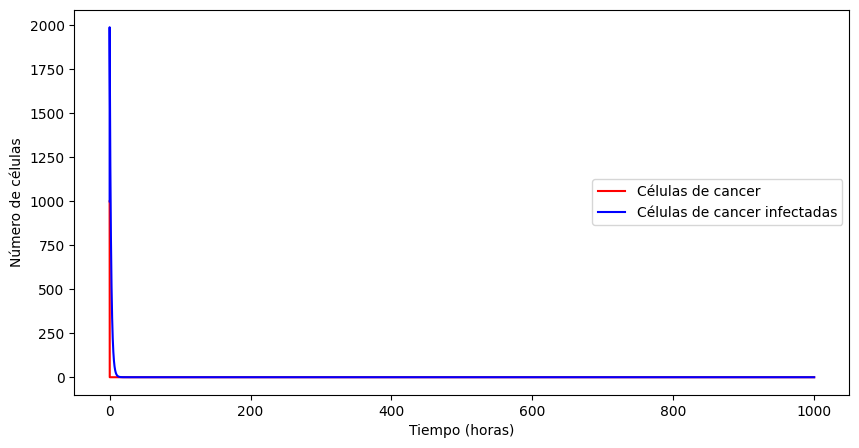

In [1405]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(t, solC, color='red', label='Células de cancer')
plt.plot(t, solI, color='blue', label='Células de cancer infectadas')
plt.legend(loc=5)
plt.xlabel('Tiempo (horas)')
plt.ylabel('Número de células')

Punto 2

In [1406]:
import numpy as np
import sympy as sym
from sympy import oo
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [1407]:
α, γ, k, μ, C, I, ε = sym.symbols('α, γ, k, μ, C, I, ε')

dCdt = α*C - (k*C*I)
dIdt = ε + (k*C*I) - μ*I

In [1408]:
dCdt

-C*I*k + C*α

In [1409]:
dIdt

C*I*k - I*μ + ε

In [1410]:
eqs = sym.solve([dCdt, dIdt], [C, I])
eqs

[(0, ε/μ), ((-ε + α*μ/k)/α, α/k)]

In [1411]:
eqs[0][0]

0

In [1412]:
eqs[0][1]

ε/μ

In [1413]:
eqs[1][0]

(-ε + α*μ/k)/α

In [1414]:
eqs[1][1]

α/k

In [1415]:
Meq=sym.Matrix([dCdt,dIdt])
Meq

Matrix([
[   -C*I*k + C*α],
[C*I*k - I*μ + ε]])

In [1416]:
Mvar=sym.Matrix([C, I])
Mvar

Matrix([
[C],
[I]])

In [1417]:
Jac = Meq.jacobian(Mvar)
Jac

Matrix([
[-I*k + α,    -C*k],
[     I*k, C*k - μ]])

In [1418]:
inx_eq = 1
Ceq=sym.simplify(eqs[inx_eq][0])
Ieq=sym.simplify(eqs[inx_eq][1])
print(f"C eq = {Ceq}")
print(f"I eq = {Ieq}")

Jaceq = Jac.subs(C,Ceq).subs(I,Ieq)
print(Jaceq)
eig = Jaceq.eigenvals()
Eig = list(eig.keys())
Eig1 = Eig[0]
Eig2 = Eig[1]
print(f"Valor propio 1 = {sym.simplify(Eig1)}")
print(f"Valor propio 2 = {sym.simplify(Eig2)}")

C eq = -ε/α + μ/k
I eq = α/k
Matrix([[0, -k*(-ε/α + μ/k)], [α, k*(-ε/α + μ/k) - μ]])
Valor propio 1 = (-k*ε - sqrt(k**2*ε**2 + 4*k*α**2*ε - 4*α**3*μ))/(2*α)
Valor propio 2 = (-k*ε + sqrt(k**2*ε**2 + 4*k*α**2*ε - 4*α**3*μ))/(2*α)


In [1419]:
Jaceq.det()

-k*ε + α*μ

In [1420]:
sym.simplify(Jaceq.trace())

-k*ε/α

In [1421]:
# C
eq_sis_2 = (-ε + α*μ/k)/α
sym.simplify(eq_sis_2)

-ε/α + μ/k

In [1422]:
sym.Eq(ε ,(sym.solve(eq_sis_2, [ε])[0]))

Eq(ε, α*μ/k)

In [1423]:
sym.Eq(k ,sym.solve(eq_sis_2, [k])[0])

Eq(k, α*μ/ε)

In [1424]:
# I
α/k

α/k

Text(0, 0.5, 'Número de células')

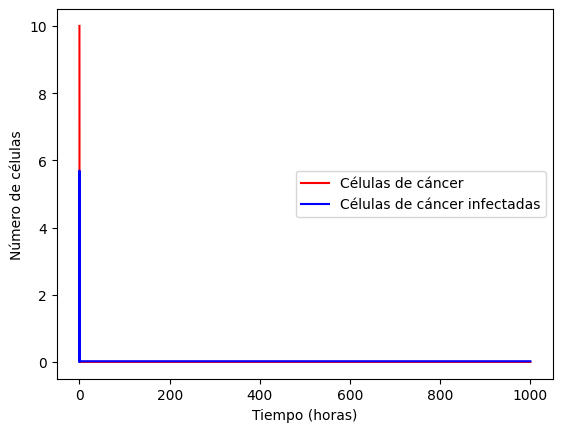

In [1425]:
# Parámetros
α = 2 # 1/hora *
k = 100 #
μ = 100 # 1/hora *
C0 = 10 # Cancer Inicial
I0 = 0  # Cancer + Virus Inicial
ε = 2 # 1/hora

dt = 0.01
tmax = 1000
steps = int(tmax/dt)

def model(z, t):
    C, I  = z
    dCdt = α*C - (k*C*I)
    dIdt = ε + (k*C*I) - μ*I
    return np.array([dCdt, dIdt])

t = np.linspace(0,tmax, steps)
c0 = np.array([C0, I0])

sol = odeint(model,c0,t)  # Solución del sistema
solC = sol[:,0]
solI = sol[:,1]

plt.plot(t, solC, color='red', label='Células de cáncer')
plt.plot(t, solI, color='blue', label='Células de cáncer infectadas')
plt.legend(loc=5)
plt.xlabel('Tiempo (horas)')
plt.ylabel('Número de células')
# plt.xscale('log')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


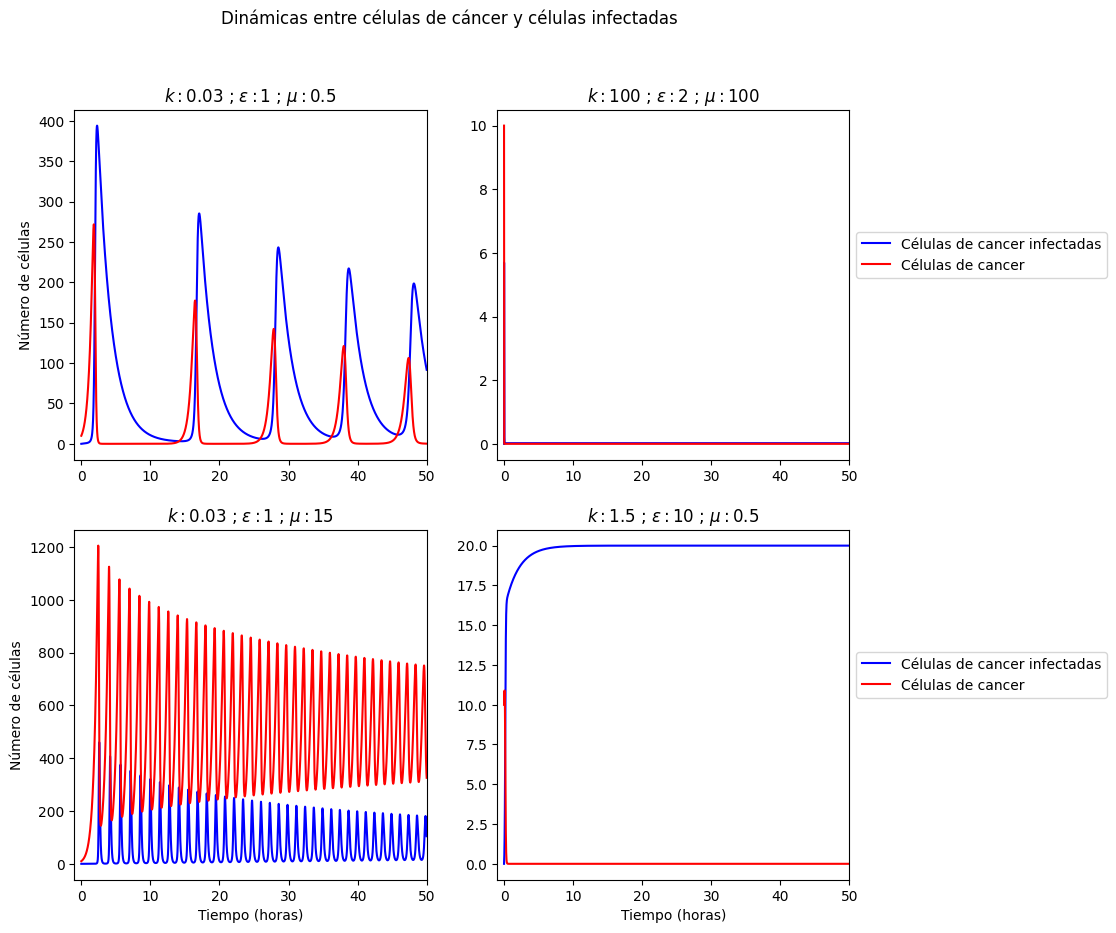

In [1426]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

k_values = [0.03,   0.03,       100,  1.5]
ε_values = [1,      1,          2,  10]
μ_values = [0.5,    15,         100, 0.5]

a_indx =   [0, 0, 1, 1]
a_indx_2 = [0, 1, 0, 1]

for i in range(len(k_values)):

    # ______ Parámetros _______
    
    α = 2           # 1/hora *
    k = k_values[i] # 
    μ = μ_values[i]         # 1/hora *
    C0 = 10         # Cancer Inicial
    I0 = 0          # Cancer + Virus Inicial
    ε = ε_values[i] # 1/hora
    
    # _____ Parámetros de tiempo ______
    
    dt = 0.01
    tmax = 50
    steps = int(tmax/dt)
    
    # ____ Solución del sistema _____ 
    t = np.linspace(0,tmax, steps)
    c0 = np.array([C0, I0])
    sol = odeint(model,c0,t)  # Solución del sistema
    solC = sol[:,0]
    solI = sol[:,1]

    # ____ Cálculo de Equilibrios ___
    eqs = [(0, ε/μ), ((-ε + α*μ/k)/α, α/k)]
    
    # ______ Gráficos ______
    ax[a_indx_2[i], a_indx[i]].plot(t, solI, color='blue', label='Células de cancer infectadas')
    ax[a_indx_2[i], a_indx[i]].plot(t, solC, color='red', label='Células de cancer')
    ax[a_indx_2[i], a_indx[i]].set_title(fr'$k: {k}$ ; $ε: {ε}$ ; $μ:{μ}$')
    ax[a_indx_2[i], a_indx[i]].set_xlim(-1, tmax)
    
ax[0, 1].legend(loc='lower left', bbox_to_anchor=(1, 0.5))
ax[1, 1].legend(loc='lower left', bbox_to_anchor=(1, 0.5))

fig.suptitle(r'Dinámicas entre células de cáncer y células infectadas')

for i in range(len(k_values)):
    ax[1, a_indx[i]].set_xlabel('Tiempo (horas)')
    ax[a_indx_2[i], 0].set_ylabel(r'Número de células')
    
fig.savefig('Coma_etilico_15_min.eps')